In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## **Data loading**

In [2]:
train_X = pd.read_csv("../input/titanic/train.csv")
train_X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_X = pd.read_csv("../input/titanic/test.csv")
test_X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Preprocessing

#### Data Exploration

##### As you can see there are 12 features in train datset, while there are 11 features in test dataset. There is no '***Survived***' column in test dataset.

In [4]:
print(f'Train datset titles: \n {train_X.columns}')
print(f'Number of features of train dataset: {len(train_X.columns)}')
print('\n')
print(f'Test datset titles: \n {test_X.columns}')
print(f'Number of features of test dataset: {len(test_X.columns)}')

Train datset titles: 
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Number of features of train dataset: 12


Test datset titles: 
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Number of features of test dataset: 11


#### **There are 3 types of data types of features in the dataset:**
##### ***Numerical: Age, Fare. Discrete: SibSp, Parch.***
##### ***Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.***
##### ***Mixed: Cabin***

In [5]:
train_X.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### By using .info() command we can get some information from the datasets

##### As we can see there are some missed values in 'Age', 'Cabin', and 'Embarked' columns of train dataset

In [6]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### We can visualize the thain dataset as follows:

<AxesSubplot:>

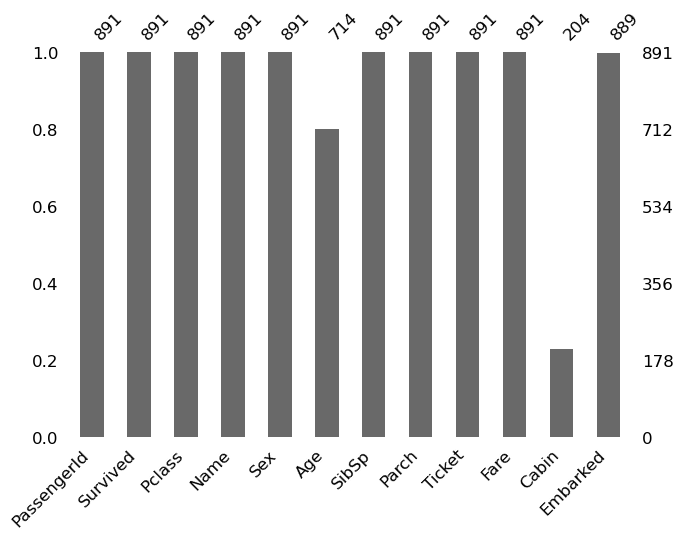

In [7]:
import matplotlib.pyplot as plt
import missingno as mso

plt.figure(figsize=(16,5))
ax_train = plt.subplot(1,2,2)
mso.bar(train_X,ax=ax_train,fontsize = 12)

In [8]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


##### As we can see there are some missed values in 'Age', 'Cabin', and 'Fare' columns of test dataset
##### We can visualize the thain dataset as follows:

<AxesSubplot:>

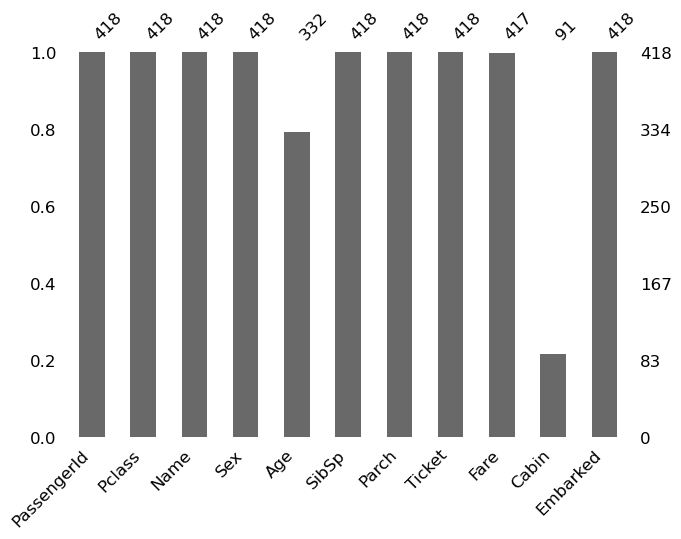

In [9]:
plt.figure(figsize=(16,5))
ax_train = plt.subplot(1,2,2)
mso.bar(test_X,ax=ax_train,fontsize = 12)

##### Now, we will fill the mised values in the numerical features

In [10]:
# Replacing missing values
train_X['Age'] = train_X['Age'].fillna(train_X['Age'].mean())
test_X['Age'] = test_X['Age'].fillna(test_X['Age'].mean())
test_X['Fare'] = test_X['Fare'].fillna(test_X['Fare'].mean())

## Feature Engineering
#### Now, we convert categorical data to numetical data using dandas library (get_dummies command)

In [11]:
train_X.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [12]:
test_X.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [13]:
train_X = pd.get_dummies(train_X, columns = ['Sex', 'Embarked', 'Pclass'])
train_X.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,0.722783,0.242424,0.206510,0.551066
std,257.353842,0.486592,13.002015,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,0.447876,0.428790,0.405028,0.497665
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
test_X = pd.get_dummies(test_X, columns = ['Sex', 'Embarked', 'Pclass'])
test_X.describe()

,PassengerId,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,30.272590,0.447368,0.392344,35.627188,0.363636,0.636364,0.244019,0.110048,0.645933,0.255981,0.222488,0.521531
std,120.810458,12.634534,0.896760,0.981429,55.840500,0.481622,0.481622,0.430019,0.313324,0.478803,0.436934,0.416416,0.500135
min,892.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1100.500000,30.272590,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1204.750000,35.750000,1.000000,0.000000,31.500000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1309.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# Dropping data having unique valus like nbame,ticket number etc
fin_train_X = train_X.drop(['PassengerId','Cabin','Name','Ticket'], axis = 1)
fin_test_X = test_X.drop(['PassengerId','Cabin','Name','Ticket'], axis = 1)

<AxesSubplot:>

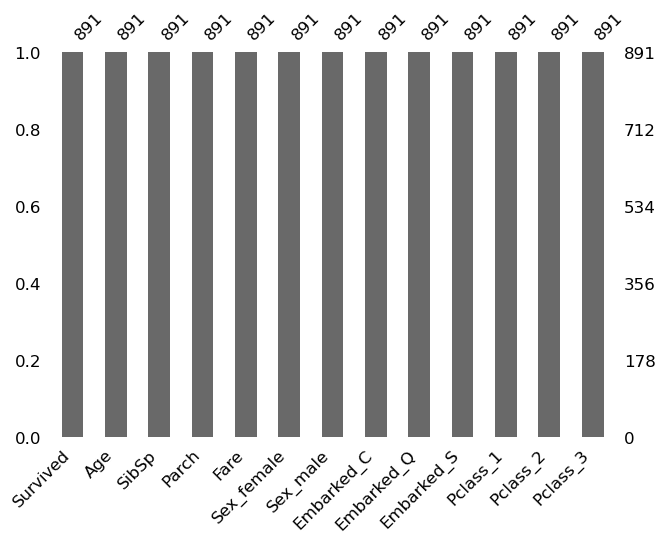

In [16]:
### Training data visualization
plt.figure(figsize=(16,5))
ax_train = plt.subplot(1,2,2)
mso.bar(fin_train_X,ax=ax_train,fontsize = 12)

<AxesSubplot:>

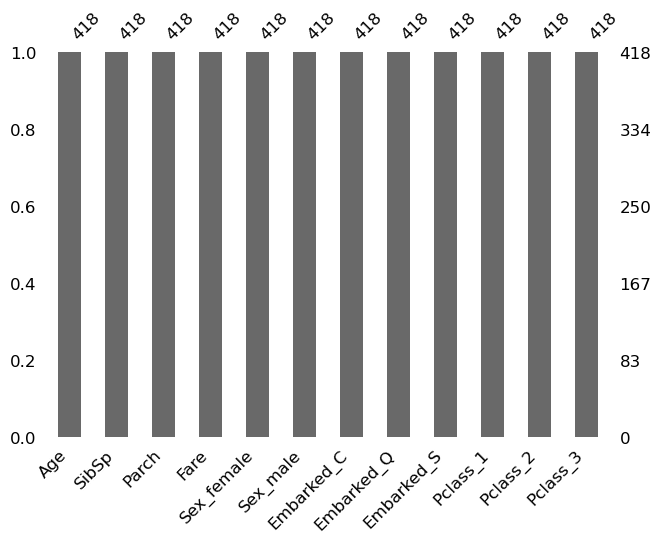

In [17]:
### Testing data visualization
plt.figure(figsize=(16,5))
ax_train = plt.subplot(1,2,2)
mso.bar(fin_test_X,ax=ax_train,fontsize = 12)

In [18]:
print(fin_train_X['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


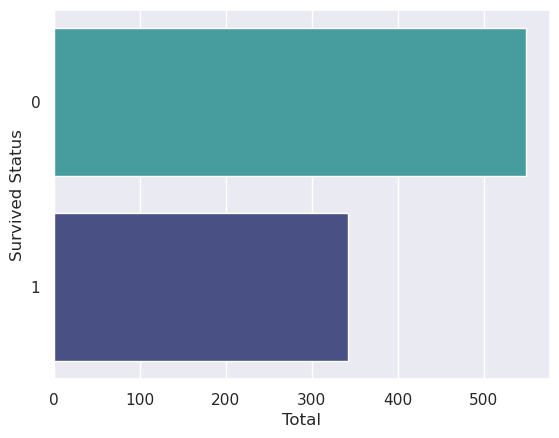

In [19]:
import seaborn as sns

## We can check the data balanced or inbalanced in train dataset

sns.set_theme(style="darkgrid")
sns.countplot(y=fin_train_X['Survived'], data=fin_train_X, palette="mako_r")
plt.ylabel('Survived Status')
plt.xlabel('Total')
plt.show()

### Split the dataset into train and test datasets

In [20]:
from sklearn.model_selection import train_test_split
X = fin_train_X.drop(['Survived'], axis = 1)
y = fin_train_X['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 12)
(179, 12)
(712,)
(179,)


### Train ML Models

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


### Decision tree

d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, y_train)

y_pred = d_tree.predict(X_test)

print(classification_report(y_test, y_pred), end='\n')
print('\n')
print(confusion_matrix(y_test, y_pred), end='\n')
print('\n')
print('Decision Tree classification accuracy: {:.2f}%'.format(accuracy_score(y_pred,y_test)*100),end = '\n')


              precision    recall  f1-score   support

           0       0.81      0.79      0.80       109
           1       0.68      0.71      0.70        70

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



[[86 23]
 [20 50]]


Decision Tree classification accuracy: 75.98%


In [22]:
### Random Forest

RFclassifier = RandomForestClassifier(max_leaf_nodes=45)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       109
           1       0.80      0.69      0.74        70

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179

[[97 12]
 [22 48]]
Random Forest accuracy is: 81.01%


In [23]:
GBclassifier = GradientBoostingClassifier(n_estimators=400, max_depth=3, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy is: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       109
           1       0.77      0.70      0.73        70

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

[[94 15]
 [21 49]]
Gradient Boosting accuracy is: 79.89%


In [24]:
### CatBoost
import catboost
from catboost import CatBoostClassifier

# model
model = CatBoostClassifier(verbose=False, random_state=18)

# evaluation
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       109
           1       0.77      0.69      0.73        70

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



## Evaluation

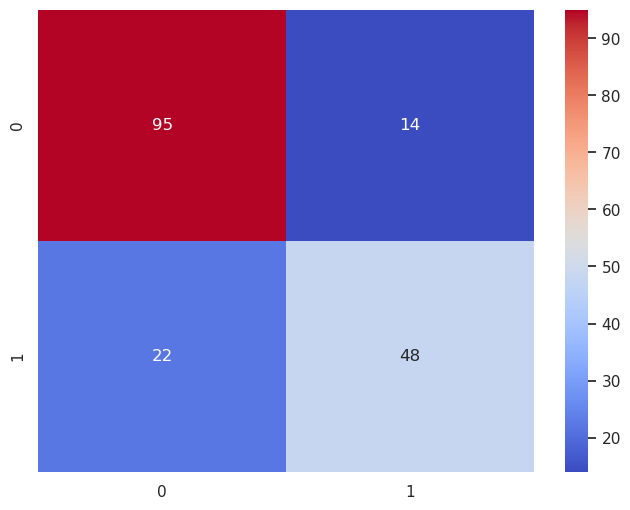

In [25]:
# confusion matrix
plt.figure(figsize=(8,6))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="g", cmap='coolwarm')
plt.show()

<Figure size 800x600 with 0 Axes>

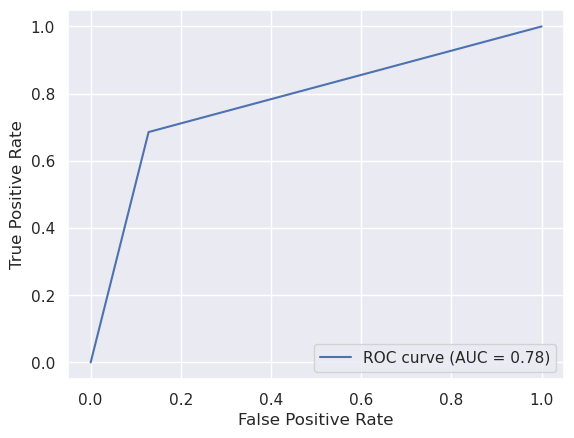

In [26]:
from sklearn.metrics import *
# ROC curve
plt.figure(figsize=(8,6))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [27]:
# model fitting
from sklearn.model_selection import cross_val_score
model = CatBoostClassifier(verbose=False, random_state=18)
model.fit(X,y)
# evaluation
"Cross-validation roc_auc score :",cross_val_score(model, X, y, cv=5, scoring='roc_auc').mean()

('Cross-validation roc_auc score :', 0.8681316698271578)

In [28]:
# evaluation
"Cross-validation accuracy score :",cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()

('Cross-validation accuracy score :', 0.8260498399347185)

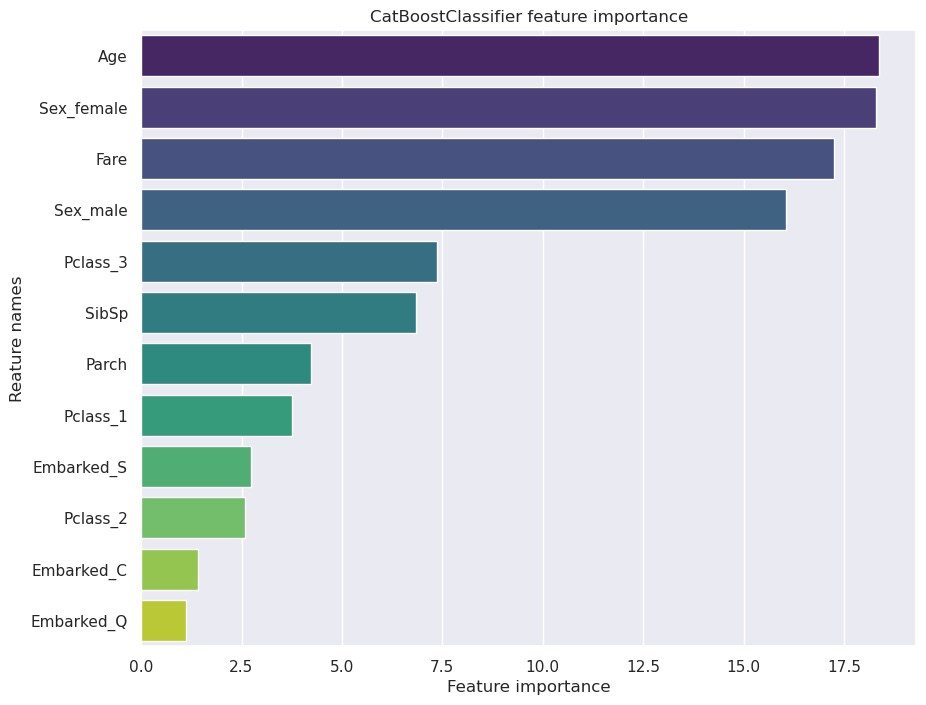

In [29]:
# Feature importance
plt.figure(figsize=(10,8))
fs = pd.Series(model.get_feature_importance(), index=X.columns).sort_values(ascending=False)
sns.barplot(x=fs.values, y=fs.index, palette='viridis')
plt.title('CatBoostClassifier feature importance')
plt.xlabel('Feature importance')
plt.ylabel('Reature names')
plt.show()

In [30]:
prediction = model.predict(fin_test_X)

In [31]:
output = pd.DataFrame({'PassengerId': test_X['PassengerId'], 'Survived': prediction})
output.to_csv('submission.csv', index=False)

In [32]:
predcsv = pd.read_csv('./submission.csv')
predcsv.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
